In [30]:
%run '~/work/pyhton-for-the-data-scientist/Data/DVF.ipynb'

In [32]:
df_DVF=df4

# Statistique descriptive exploratoire

On cherche d'abord à manipuler les bases de données en notre possession de manière très descriptive pour tirer des premiers enseignements des données disponibles

> ## Prix constatés de DVF

On s'intéresse d'abord aux prix déclarés et disponibles sur le site de DVF (Demande de valeurs foncières). Ce sont des prix pour l'année 2021 concernant les transactions à Marseille.

In [33]:
round(df_DVF.describe(),2)

,Valeur fonciere,Surface reelle bati,Surface terrain
count,2745.00,2745.00,2745.00
mean,1519152.39,69.19,426.78
std,3572295.76,46.51,773.33
min,30000.00,1.00,1.00
25%,285000.00,32.00,140.00
50%,449350.00,59.00,245.00
75%,730500.00,95.00,496.00
max,15000000.00,410.00,20528.00


Notre jeu de données comporte 2745 individus. On se concentre sur 3 variables :
- La **valeur foncière** : Un bien appartement ou une maison vendu en 2021 à Marseille valait en moyenne 1 519 152€. On peut soupçonner que ce prix élevé est dû à des valeurs extrêmes, notamment en remarquant que la valeur maximale des ventes était de 15 000 000€, et en notant la forte disparité entre moyenne et médiane (450 000€ environ). La variance de la valeur foncière est énorme : les prix sont éclatés et ne suivent en effet pas du tout une loi normale.
- La **surface bâtie** : Un bien immobilier bâti vendu à Marseille en 2021 faisait en moyenne 69 $m{^2}$, et la médiane est de 59 $m{^2}$. La variance de la surface bâtie est beaucoup moins élevée que pour la valeur foncière.
- La **surface du terrain** : Les terrains vendus à Marseille en 2021 faisaient en moyenne 427 $m{^2}$. On peut soupçonner ici aussi que cette moyenne est tirée vers le haut par des valeurs extrèmes.

Représentons maintenant le prix moyen constaté du $m{^2}$ à la vente à Marseille en 2021 en fonction des arrondissements :

In [48]:
DVFmoy=df_DVF.groupby("Commune").mean(numeric_only=True)
round(DVFmoy, 2)

,Valeur fonciere,Surface reelle bati,Surface terrain
Commune,,,
MARSEILLE 10EME,379440.37,53.16,257.03
MARSEILLE 11EME,456281.67,92.48,658.62
MARSEILLE 12EME,579129.50,91.90,689.26
MARSEILLE 13EME,2495428.30,78.55,801.26
MARSEILLE 14EME,267443.44,73.90,511.80
MARSEILLE 15EME,366797.14,63.37,457.85
MARSEILLE 16EME,268873.62,65.80,287.63
MARSEILLE 1ER,948327.91,50.56,161.62
MARSEILLE 2EME,397568.70,57.43,65.35


In [51]:
DVFmoy["Prix au m2"]=DVFmoy['Valeur fonciere']/DVFmoy['Surface reelle bati']
round(DVFmoy, 2)

,Valeur fonciere,Surface reelle bati,Surface terrain,Prix au m2
Commune,,,,
MARSEILLE 10EME,379440.37,53.16,257.03,7137.20
MARSEILLE 11EME,456281.67,92.48,658.62,4933.90
MARSEILLE 12EME,579129.50,91.90,689.26,6301.69
MARSEILLE 13EME,2495428.30,78.55,801.26,31770.20
MARSEILLE 14EME,267443.44,73.90,511.80,3619.20
MARSEILLE 15EME,366797.14,63.37,457.85,5788.27
MARSEILLE 16EME,268873.62,65.80,287.63,4086.32
MARSEILLE 1ER,948327.91,50.56,161.62,18757.18
MARSEILLE 2EME,397568.70,57.43,65.35,6922.09


In [52]:
import matplotlib.pyplot as plt

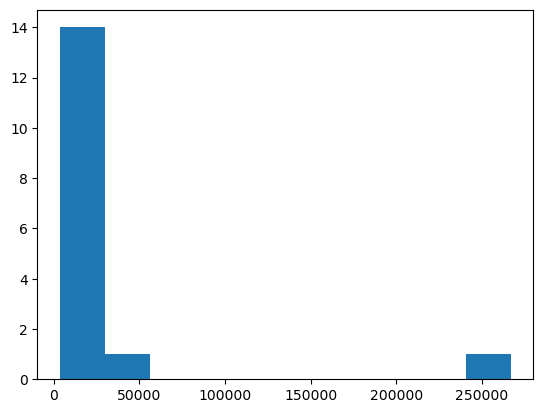

In [53]:
plt.hist(DVFmoy["Prix au m2"])
plt.show()